# DATA IMBALANCE

We can simply define data imbalance as unequal distribution of classes within dataset. this implies that one class contain more data than other classes

## Why Data Imbalance

Data imbalance occurs when specific class in certain dataset appears more than the other. That is class is not a 50/50 or 60/40 distribution.

## Data is balanced in order to:

When data is imbalanced the model tend to learn from the classes with more frequency. So the model may be more likely to predict wrong values. Balanced data are good in classification.

## Methods used in Balancing data

 WEIGHT BALANCE : This method balance data by altering the weight that each training example carries when computing.
 OVER AND UNDER SAMPLING :In under Sampling only few data is being selected from the majority While in Over Sampling the copies of minority are created to have the same number as the majority.
    
 Also there are some other ways to deal with imbalanced data which are:
    
  COLLECTING MORE DATA

  CHANGING THE PERFOMANCE METRIC
    
  GENERATING SYNTHETIC SAMPLES Example by using SMOTE



In [1]:
#DATA BALANCING USING OVER AND UNDER SAMPLING
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


In [2]:
data=pd.read_csv("train_data_week_1_challenge.csv")
data.head()

,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,continue,s01746,M,BC,0.666,0.468,0.666,7,6,other,True,305,354,86.0,1986.0
1,continue,s16986,M,BC,0.172,0.420,0.172,8,10,mother,False,331,516,15.0,1996.0
2,continue,s00147,F,BC,0.212,0.601,0.212,1,4,mother,False,311,209,14.0,1976.0
3,continue,s08104,F,ST,0.434,0.611,0.434,2,5,father,True,364,147,28.0,1911.0
4,continue,s11132,F,SC,0.283,0.478,0.283,1,10,mother,True,394,122,15.0,1889.0


In [3]:
data.continue_drop.value_counts()

continue    16384
drop          806
Name: continue_drop, dtype: int64

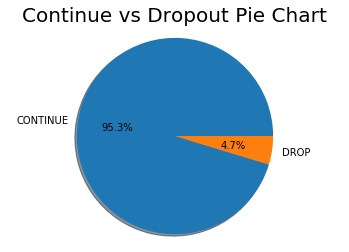

In [4]:
#visualization
labels = ['CONTINUE', 'DROP']
sizes = [data['continue_drop'].value_counts()[0],
         data['continue_drop'].value_counts()[1]
        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Continue vs Dropout Pie Chart', fontsize=20)
plt.show()

In [5]:
columns_to_transform = [ 'gender','caste','guardian','internet' ]
data = pd.get_dummies( data,columns = columns_to_transform )
data.head()


,continue_drop,student_id,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,school_id,total_students,total_toilets,...,caste_BC,caste_OC,caste_SC,caste_ST,guardian_father,guardian_mixed,guardian_mother,guardian_other,internet_False,internet_True
0,continue,s01746,0.666,0.468,0.666,7,6,305,354,86.0,...,1,0,0,0,0,0,0,1,0,1
1,continue,s16986,0.172,0.420,0.172,8,10,331,516,15.0,...,1,0,0,0,0,0,1,0,1,0
2,continue,s00147,0.212,0.601,0.212,1,4,311,209,14.0,...,1,0,0,0,0,0,1,0,1,0
3,continue,s08104,0.434,0.611,0.434,2,5,364,147,28.0,...,0,0,0,1,1,0,0,0,0,1
4,continue,s11132,0.283,0.478,0.283,1,10,394,122,15.0,...,0,0,1,0,0,0,1,0,0,1


In [6]:
mapping_dict={"continue_drop":{"drop":0,"continue":1}}

In [7]:
data.replace(mapping_dict,inplace=True)

In [8]:
data= data.drop('student_id', 1)

In [9]:
#BALANCING DATA USING UNDER SAMPLING
from sklearn.utils import resample

In [10]:
data_maj = data[data.continue_drop==1]
data_min = data[data.continue_drop==0]

In [11]:
data_minority_upsampled = resample(data_min, 
                                 replace=True,     # sample with replacement
                                 n_samples=16384,    # to match majority class
                                 random_state=123) # reproducible results
 

In [12]:
data_upsampled = pd.concat([data_maj, data_minority_upsampled])

In [13]:
data_upsampled.continue_drop.value_counts()

1    16384
0    16384
Name: continue_drop, dtype: int64

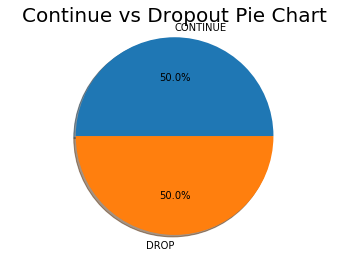

In [14]:
labels = ['CONTINUE', 'DROP']
sizes = [data_upsampled['continue_drop'].value_counts()[0],
         data_upsampled['continue_drop'].value_counts()[1]
        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Continue vs Dropout Pie Chart', fontsize=20)
plt.show()